# Objet

Répétition du cours N° 18 - [PANDAS PYTHON Tutoriel Français - Time Series](https://www.youtube.com/watch?v=qHRLG5hsW9I)

# Libs

In [1]:
import os
from ml_jpy_commons import *

c:\Users\franc\Desktop\OC DS\Practising\Machine Learnia\data\ exists
c:\Users\franc\Desktop\OC DS\Practising\Machine Learnia\data\csv\ exists


# Bitcoins : BTC-EUR

## Import des données

TODO : les récupérer directement sans passer par un DL manuel.


In [2]:
import pandas as pd
btc_eur_filename = 'BTC-EUR_20140917_20220905.csv'
btc_eur_filepath = os.path.join(csv_data_dir, btc_eur_filename)
btc_eur = pd.read_csv(btc_eur_filepath)
display(btc_eur)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
3,2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
4,2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625
...,...,...,...,...,...,...,...
2906,2022-09-01,19974.527344,20143.310547,19757.466797,20224.716797,20224.716797,30328353496
2907,2022-09-02,20223.644531,20370.679688,19897.353516,20064.068359,20064.068359,29261522450
2908,2022-09-03,20064.015625,20131.625000,19791.371094,19925.734375,19925.734375,23724552286
2909,2022-09-04,19926.121094,20170.126953,19729.541016,20172.349609,20172.349609,25480345215


<AxesSubplot:>

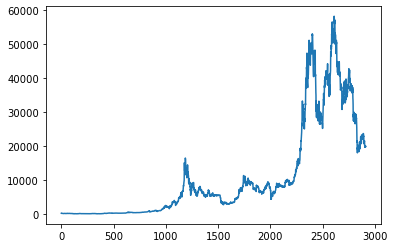

In [6]:
btc_eur.Close.plot()

## Passage à un index `Datetime`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html

<img src='..\img\ml_18_1.jpg' width=75%, height=75%></img>

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot:xlabel='Date'>

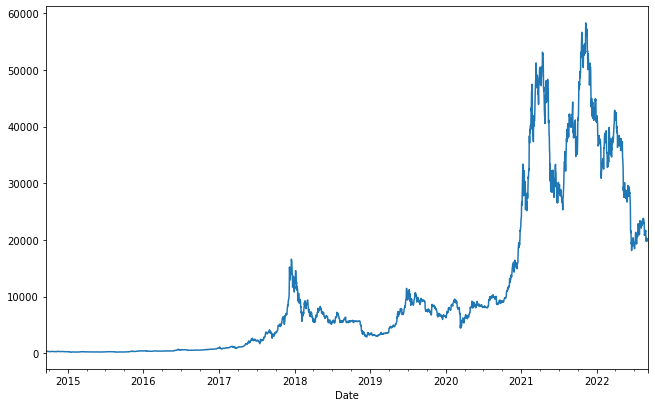

In [13]:
btc_eur = pd.read_csv(btc_eur_filepath, index_col='Date', parse_dates=True)
display(btc_eur.head())
figsize = (16.18 * 2/3, 10 * 2/3)
btc_eur.Close.plot(figsize=figsize)

## Indexing et slicing

Que de la joie !

<img src='..\img\ml_18_2.jpg' width=75%, height=75%></img>

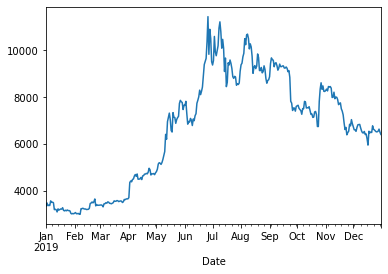

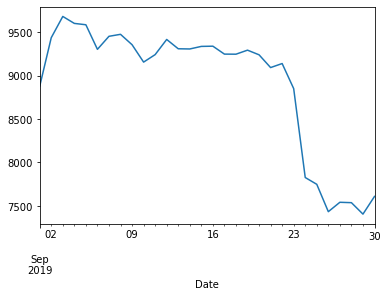

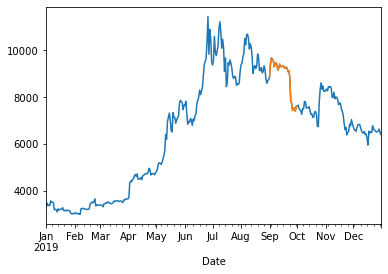

In [18]:
import matplotlib.pyplot as plt
btc_eur.loc['2019'].Close.plot(); plt.show()
btc_eur.loc['2019-09'].Close.plot(); plt.show()
btc_eur.loc['2019'].Close.plot()
btc_eur.loc['2019-09'].Close.plot()
plt.show()

<AxesSubplot:xlabel='Date'>

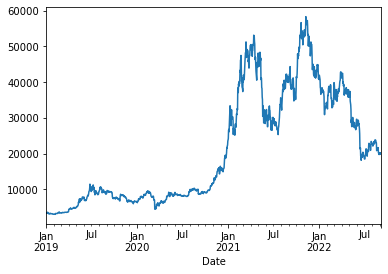

In [20]:
btc_eur.loc['2019':].Close.plot()

## Resample

<img src='..\img\ml_18_3.jpg' width=75%, height=75%></img>

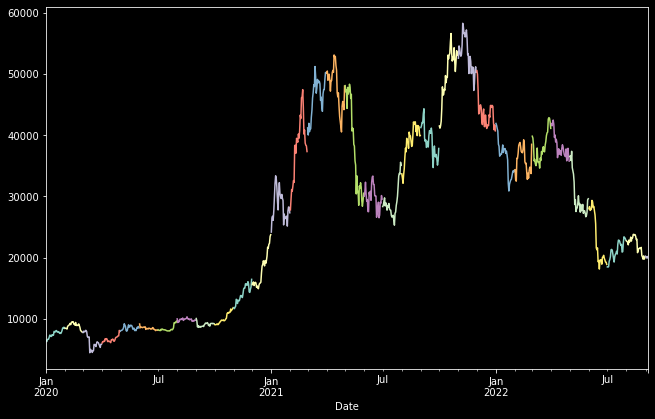

In [24]:
import matplotlib as mpl
mpl.style.use('dark_background')
btc_eur.loc['2020':'2022'].Close.resample('M').plot(figsize=figsize)
plt.show()

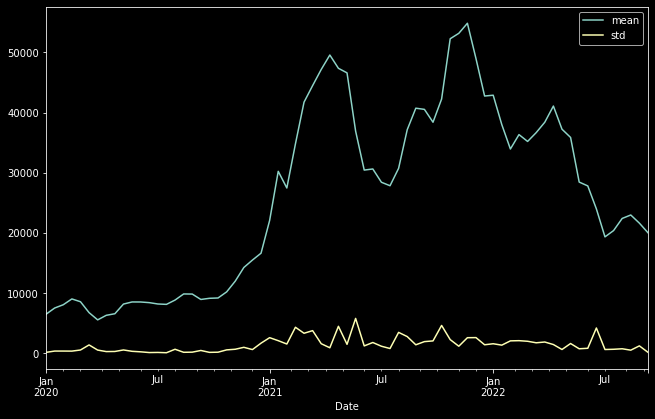

In [27]:
btc_eur.loc['2020':'2022'].Close.resample('2W').mean().plot(figsize=figsize)
btc_eur.loc['2020':'2022'].Close.resample('2W').std().plot(figsize=figsize)
plt.legend(['mean', 'std'])
plt.show()

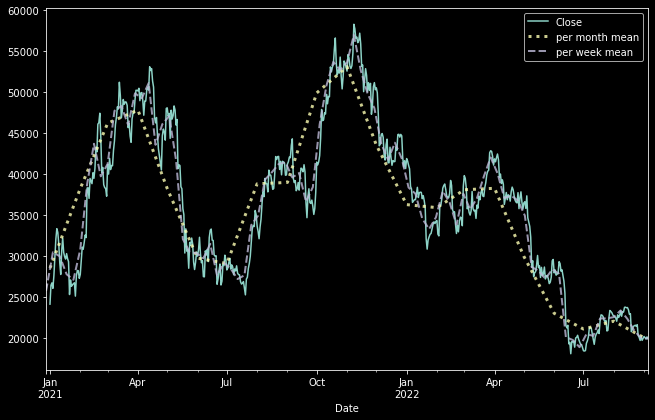

In [28]:
plt.figure(figsize=figsize)
btc_eur.loc['2021':'2022'].Close.plot()
btc_eur.loc['2021':'2022'].Close.resample('M').mean().plot(label='per month mean', lw=3, ls=':', alpha=.8)
btc_eur.loc['2021':'2022'].Close.resample('W').mean().plot(label='per week mean', lw=2, ls='--', alpha=.8)
plt.legend()
plt.show()

,mean,std,min,max
Date,,,,
2021-01-03,25800.389974,1423.001915,24165.556641,26760.720703
2021-01-10,30491.545759,2758.078498,26094.005859,33372.281250
2021-01-17,30009.262277,1375.535801,27786.228516,32250.857422
2021-01-24,27816.861049,1944.480989,25338.507813,30328.933594
2021-01-31,27143.953683,1086.374265,25144.740234,28272.550781


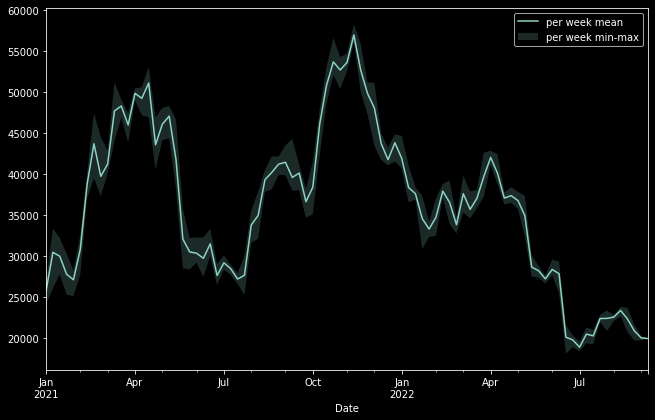

In [34]:
stats = btc_eur.loc['2021':].Close.resample('W').agg(['mean', 'std', 'min', 'max'])
display(stats.head())
plt.figure(figsize=figsize)
stats['mean'].plot(label='per week mean')
plt.fill_between(stats.index, stats['min'], stats['max'], alpha=.2, label='per week min-max')
plt.legend()
plt.show()


## Moyennes mobiles (moving averages)

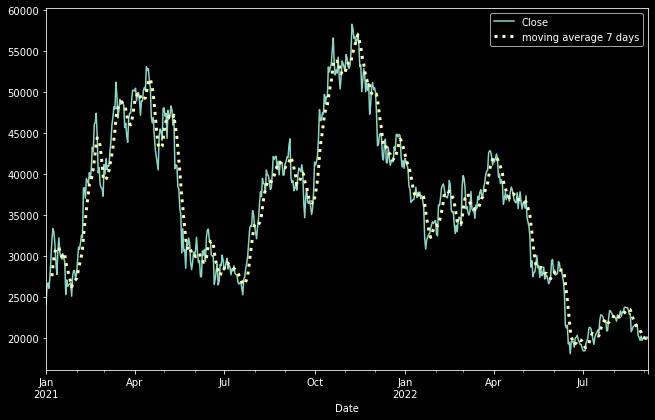

In [37]:
btc_eur_2021_ = btc_eur.loc['2021':].Close
plt.figure(figsize=figsize)
btc_eur_2021_.plot()
btc_eur_2021_.rolling(window=7).mean().plot(label='moving average 7 days', lw=3, ls=':')
plt.legend()
plt.show()

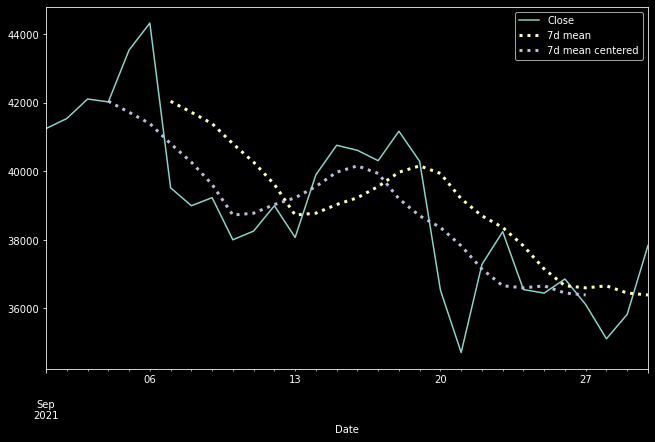

In [42]:
btc_eur_2021_09 = btc_eur_2021_['2021-09']
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
btc_eur_2021_09.rolling(window=7).mean().plot(label='7d mean', lw=3, ls=':')
btc_eur_2021_09.rolling(window=7, center=True).mean().plot(label='7d mean centered', lw=3, ls=':')
plt.legend()
plt.show()

## Moyenne mobile exponentielle

Pour la calculer, évidemment, ce doit être plutôt :

$\bar{x}_t=\alpha\left(x_t + \left(1 - \alpha\right)\left(x_{t - 1} + \left(1 - \alpha\right)\left(x_{t - 2} + \left(1 - \alpha\right)\left(x_{t - 3}\right)\right)\right)...\right)$

<img src='..\img\ml_18_4.jpg' width=75%, height=75%></img>

<img src='..\img\ml_18_5.jpg' width=75%, height=75%></img>

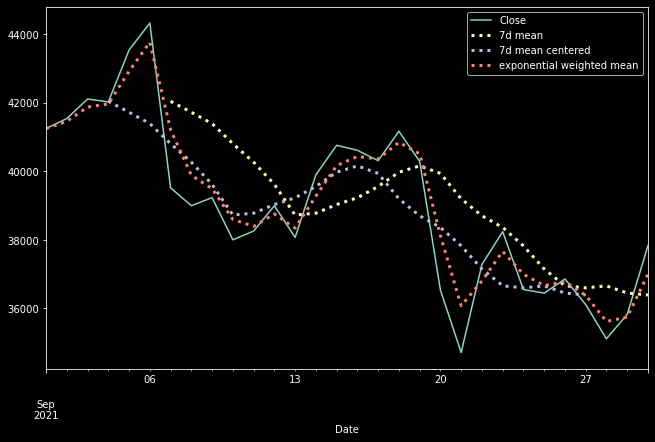

In [43]:
# btc_eur_2021_09 = btc_eur_2021_['2021-09']
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
btc_eur_2021_09.rolling(window=7).mean().plot(label='7d mean', lw=3, ls=':')
btc_eur_2021_09.rolling(window=7, center=True).mean().plot(label='7d mean centered', lw=3, ls=':')
btc_eur_2021_09.ewm(alpha=.6).mean().plot(label='exponential weighted mean', lw=3, ls=':')
plt.legend()
plt.show()

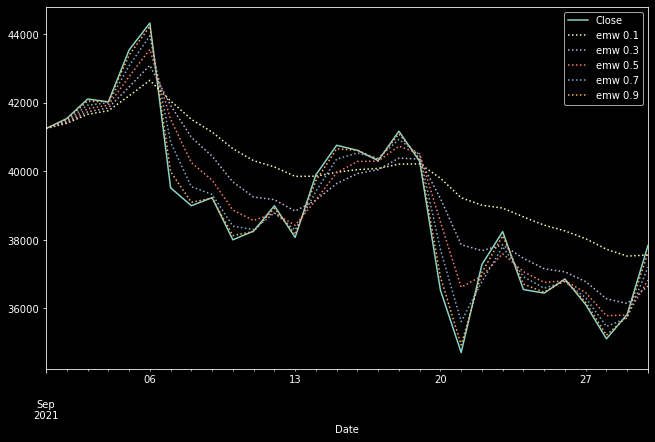

In [47]:
# btc_eur_2021_09 = btc_eur_2021_['2021-09']
import numpy as np
plt.figure(figsize=figsize)
btc_eur_2021_09.plot()
for alpha in np.arange(.1, 1, .2):
    btc_eur_2021_09.ewm(alpha=alpha).mean().plot(label=f'emw {round(alpha, 1)}', ls=':')
plt.legend()
plt.show()

## Fusion / jointure (merge == join)
